In [ ]:
%tensorflow_version 2.x


In [ ]:
#1. keras -> tensorfloq.keras
from keras.datasets.fashion_mnist import load_data
#((x_train, y_train),(x_test, y_test) )
(x_train, y_train),(x_test, y_test) = load_data()

Using TensorFlow backend.


4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [ ]:
import pandas as pd
pd.DataFrame(x_train[0])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,13,73,0,0,1,4,0,0,0,0,1,1,0
4,0,0,0,0,0,0,0,0,0,0,0,0,3,0,36,136,127,62,54,0,0,0,1,3,4,0,0,3
5,0,0,0,0,0,0,0,0,0,0,0,0,6,0,102,204,176,134,144,123,23,0,0,0,0,12,10,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,155,236,207,178,107,156,161,109,64,23,77,130,72,15
7,0,0,0,0,0,0,0,0,0,0,0,1,0,69,207,223,218,216,216,163,127,121,122,146,141,88,172,66
8,0,0,0,0,0,0,0,0,0,1,1,1,0,200,232,232,233,229,223,223,215,213,164,127,123,196,229,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,183,225,216,223,228,235,227,224,222,224,221,223,245,173,0


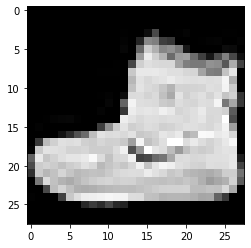

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(x_train[0],cmap="gray")

In [ ]:
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.models import Sequential
mlp = Sequential()
#第一層選用128層(憑經驗選擇，784/10約為100，64 or 256)且設為relu，784為28*28攤開成一維
mlp.add(Dense(128, activation="relu", input_dim=784))
#Dropout
mlp.add(Dropout(0.25))
mlp.add(Dense(10, activation="softmax"))
mlp.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#最後一層個數
#1:categorical_crossentropy  2up:categorical_crossentropy
#激活函數
#1:sigmoid 2up:softmax

# from tensorflow.keras.losses import categorical_crossentropy
# mlp.compile(loss=categorical_crossentropy,
#               optimizer="adam",
#               metrics=["accuracy"],)

mlp.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [ ]:
#Normalization，reshape(-1,)指電腦計算
#mlp:進去要1D，tensorflow:輸入[-1,1][0,1]
x_train_norm = x_train.reshape(-1,784)/255
x_test_norm = x_test.reshape(-1,784)/255
pd.DataFrame(x_train_norm)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.003922,0.0,0.0,0.000000,0.000000,0.160784,0.737255,0.403922,0.211765,0.188235,0.168627,0.341176,0.658824,0.521569,0.062745,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003922,0.0,0.0,0.000000,0.192157,0.533333,0.858824,0.847059,0.894118,...,0.956863,0.941176,0.952941,0.839216,0.878431,0.635294,0.000000,0.007843,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003922,0.000000,0.000000,0.545098,0.572549,0.509804,0.529412,0.529412,0.537255,0.490196,0.486275,0.490196,0.474510,0.466667,0.447059,0.509804,0.298039,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.086275,0.462745,0.094118,0.000000,0.000000,0.000000,0.000000,0.000000,0.188235,0.345098,0.019608,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.047059,0.392157,0.831373,0.803922,...,0.415686,0.400000,0.294118,0.039216,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.003922,0.000000,0.000000,0.000000,0.070588,0.164706,0.223529,0.219608,0.125490,0.031373,0.000000,0.000000,0.003922,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.129412,0.376471,0.686275,0.611765,0.250980,0.054902,0.211765,0.537255,0.800000,0.760784,0.400000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.286275,0.729412,0.694118,0.717647,0.686275,0.737255,...,0.325490,0.596078,0.333333,0.627451,0.521569,0.392157,0.047059,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.015686,0.000000,0.007843,0.000000,0.137255,0.015686,0.129412,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.101961,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.741176,0.807843,0.733333,0.125490,...,1.000000,0.949020,1.000000,0.274510,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.239216,0.400000,0.658824,0.098039,0.000000,0.545098,0.631373,0.290196,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
59996,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000

In [ ]:
#答案要做one-hot encoding
from tensorflow.keras.utils import to_categorical 
y_train_cat = to_categorical (y_train)
y_test_cat = to_categorical (y_test)
print(y_train[0], y_train_cat[0])

9 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [ ]:
y_train[13]

5

In [ ]:
#batch_size:問多少筆資料進行一次梯度下降(平均)
#epochs:整份資料要看幾遍
#validation_split:train_test_split驗證模型到底好不好
#verbose: log level(0:沒有，1:適中，2:最多)
#270次的調整:60000*(1-10%)=54000，54000/一次200筆=270
#看val_loss的結果，而非val_accuracy，前面train的結果也可以忽略
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
stop_callback = EarlyStopping(patience=3, restore_best_weights=True)
save_callback = ModelCheckpoint("fashion.h5", save_best_only=True)
mlp.fit(x_train_norm,
        y_train_cat,
        batch_size=200,
        epochs=50,
        validation_split=0.1,
        callbacks=[stop_callback,save_callback],
        verbose=2)


Epoch 1/50
270/270 - 1s - loss: 0.6758 - accuracy: 0.7673 - val_loss: 0.4536 - val_accuracy: 0.8395
Epoch 2/50
270/270 - 1s - loss: 0.4628 - accuracy: 0.8387 - val_loss: 0.4210 - val_accuracy: 0.8457
Epoch 3/50
270/270 - 1s - loss: 0.4131 - accuracy: 0.8544 - val_loss: 0.3928 - val_accuracy: 0.8552
Epoch 4/50
270/270 - 1s - loss: 0.3866 - accuracy: 0.8624 - val_loss: 0.3615 - val_accuracy: 0.8693
Epoch 5/50
270/270 - 1s - loss: 0.3660 - accuracy: 0.8688 - val_loss: 0.3464 - val_accuracy: 0.8713
Epoch 6/50
270/270 - 1s - loss: 0.3485 - accuracy: 0.8748 - val_loss: 0.3446 - val_accuracy: 0.8723
Epoch 7/50
270/270 - 1s - loss: 0.3364 - accuracy: 0.8784 - val_loss: 0.3417 - val_accuracy: 0.8753
Epoch 8/50
270/270 - 1s - loss: 0.3233 - accuracy: 0.8827 - val_loss: 0.3275 - val_accuracy: 0.8803
Epoch 9/50
270/270 - 1s - loss: 0.3164 - accuracy: 0.8862 - val_loss: 0.3253 - val_accuracy: 0.8833
Epoch 10/50
270/270 - 1s - loss: 0.3088 - accuracy: 0.8883 - val_loss: 0.3210 - val_accuracy: 0.8783

In [ ]:
#做one-hot encoding 是的為1 不是的為0
#predict:機率 predict_classes:類別
pre = mlp.predict_classes(x_test_norm)
pre

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([9, 2, 1, ..., 8, 1, 5])

In [ ]:
mlp.evaluate(x_test_norm, y_test_cat)

313/313 [==============================] - 0s 1ms/step - loss: 0.3287 - accuracy: 0.8829


[0.3286854326725006, 0.8828999996185303]

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
names =[
"T-shirt/top",
"Trouser",
"Pullover",
"Dress",
"Coat",
"Sandal",
"Shirt",
"Sneaker",
"Bag",
"Ankle boot"
]
c = ["{}(預測)".format(i) for i in range(10)]
i = ["{}(正確)".format(i) for i in range(10)]
mat = confusion_matrix(y_test, pre)
mat = [np.round(row/sum(row),3) for row in mat]
pd.DataFrame(mat,columns=c,index=i)

,0(預測),1(預測),2(預測),3(預測),4(預測),5(預測),6(預測),7(預測),8(預測),9(預測)
0(正確),0.839,0.000,0.021,0.022,0.003,0.002,0.106,0.000,0.007,0.000
1(正確),0.002,0.968,0.002,0.020,0.005,0.000,0.001,0.000,0.002,0.000
2(正確),0.010,0.000,0.809,0.013,0.100,0.000,0.067,0.000,0.001,0.000
3(正確),0.023,0.007,0.011,0.891,0.034,0.000,0.030,0.000,0.004,0.000
4(正確),0.000,0.001,0.100,0.028,0.831,0.000,0.038,0.000,0.002,0.000
5(正確),0.000,0.000,0.000,0.001,0.000,0.957,0.000,0.027,0.001,0.014
6(正確),0.127,0.001,0.090,0.032,0.089,0.000,0.647,0.000,0.014,0.000
7(正確),0.000,0.000,0.000,0.000,0.000,0.018,0.000,0.952,0.000,0.030
8(正確),0.005,0.000,0.007,0.003,0.004,0.002,0.005,0.005,0.969,0.000
9(正確),0.000,0.000,0.000,0.000,0.000,0.009,0.001,0.024,0.000,0.966


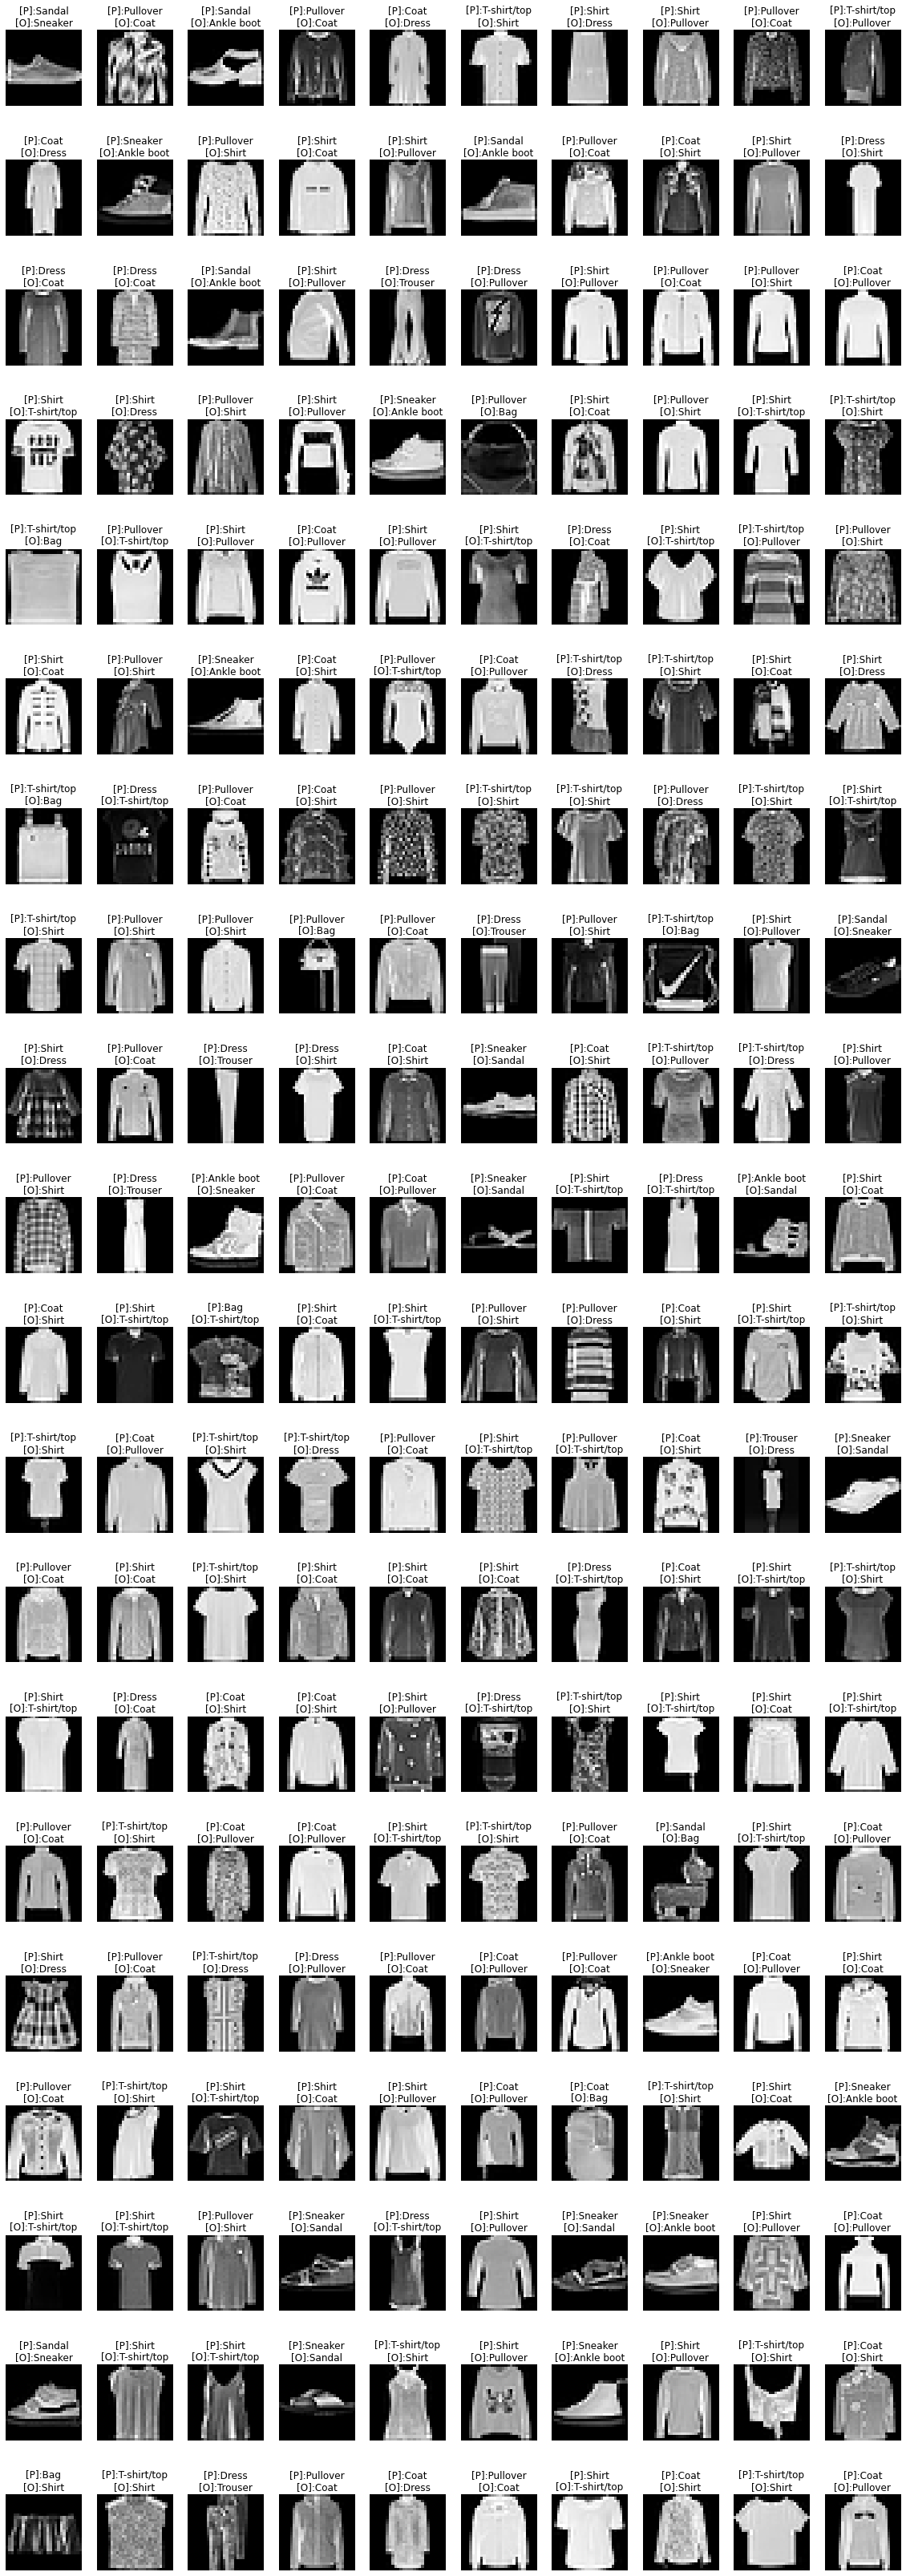

In [ ]:
#顯示出200筆
# idx = np.nonzero(pre != y_test)[0]
idx = np.nonzero(pre != y_test)[0][:200]
false_pre_img = x_test[idx]
false_pre_label = y_test[idx]
false_pre_predict = pre[idx]

width = 10
height = len(idx)//width + 1
plt.figure(figsize=(20,62))
for i,img in enumerate(false_pre_img):
  plt.subplot(height, width, i+1)
  t = "[P]:{}\n[O]:{}".format(names[false_pre_predict[i]],
                             names[false_pre_label[i]])
  plt.title(t)
  plt.axis("off")
  plt.imshow(img, cmap="gray")


In [ ]:
idx.shape

(200,)

In [ ]:
from tensorflow.keras.preprocessing.image import load_img
f = input("檔名:")
img_raw = load_img(f, target_size=(28,28)).convert("L")
img = np.array(img_raw).reshape(1,784)/255
ans = mlp.predict_classes(img)[0]
print("正確答案應該是:", ans)
plt.imshow(img_raw, cmap="gray")

檔名: 


FileNotFoundError: ignored

In [ ]:
#儲存: mlp.save("xxx.h5")
#讀取: 放上面 ModelCheckpoint
from tensorflow.keras.models import load_model
loaded = load_model("fashion.h5")
#讀取完: fit, evaluate, predict, 不需要 compile
loaded.evaluate(x_test_norm, y_test_cat)